In [139]:
"""This is a quick data analytics exercise to analyze Klay Thompson's shots so far in the 2018-2019 season up to 22nd Dec 2018. Source:
https://stats.nba.com/events/?flag=3&CFID=33&CFPARAMS=2018-19&PlayerID=202691&ContextMeasure=FGA&Season=2018-19&section=player&sct=plot&CF=SHOT_TYPE*E*3PT%20Field%20Goal:EVENT_TYPE*E*Made%20Shot"""
#import necessary packages and load the file
import pandas as pd
import requests
import numpy as np
from pandasql import sqldf  #importing pandasql
import matplotlib.pyplot as plt
import plotly.plotly as py #this package is for visualization
import plotly.graph_objs as go #this package is for visualization
pysqldf = lambda q: sqldf(q, globals()) #create first pysqldf to translate sql code into data frame
df = pd.read_csv('Klay_2018.csv', encoding = "ISO-8859-1")
df.head()

,playtype,result,shot_type,game_date,period,time_remaining,shot_distance
0,Jump Shot,Made Shot,3PT Field Goal,10/16/18,1,8:53,26
1,Pullup Jump shot,Missed Shot,2PT Field Goal,10/16/18,1,6:33,19
2,Jump Shot,Made Shot,2PT Field Goal,10/16/18,2,11:21,5
3,Jump Shot,Missed Shot,3PT Field Goal,10/16/18,2,9:47,26
4,Jump Shot,Missed Shot,3PT Field Goal,10/16/18,2,9:33,27


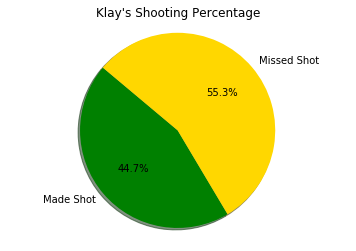

In [96]:
"""This section is to see Klay's shooting percentage this year"""
#get the dataframe that features only made shots
select = """SELECT playtype, shot_type, game_date, period, time_remaining, shot_distance FROM df WHERE result='Made Shot';"""
madeshot = pysqldf(select)
madeshot_pct = len(madeshot)/len(df)

#get the dataframe that features only missed shots
select2 = """SELECT playtype, shot_type, game_date, period, time_remaining, shot_distance FROM df WHERE result='Missed Shot';"""
missedshot = pysqldf(select2)
missedshot_pct = len(missedshot)/len(df)

# plot the pie chart
labels = 'Made Shot', 'Missed Shot'
sizes = [madeshot_pct, missedshot_pct]
colors = ['green', 'gold']
explode = (0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title("Klay's Shooting Percentage")
plt.show()

In [85]:
"""This section is to see the average distance from which Klay made his shots"""

select3 = """SELECT AVG(shot_distance) as AverageDistance FROM madeshot"""
average_distance_madeshot = pysqldf(select3)
average_distance_madeshot = average_distance_madeshot.iloc[0,0]
print ("Klay's successful shots' average distance to the basket: %sm" % ("{0:.2f}".format(average_distance_madeshot)))

Klay's successful shots' average distance to the basket: 15.92m


In [146]:
"""This section is to see Klay's made shots by period"""

periodstats = madeshot.groupby(by='period', as_index=False).agg({"game_date": pd.Series.nunique, 'time_remaining': pd.Series.nunique})
periodstats = periodstats.rename(columns={'period': 'period', 'time_remaining': 'times'})

#plot the bar chart
trace1 = go.Bar(  
    x=periodstats['period'],
    y=periodstats['times'],
    name='Average Points per Game'
) 

data4 = [trace1]
layout4 = go.Layout( #starting to plot a grouped bar chart
    title="Klay's number of made shots by period",
    barmode='group'
)

fig = go.Figure(data=data4, layout=layout4)
py.iplot(fig, filename='grouped-bar')

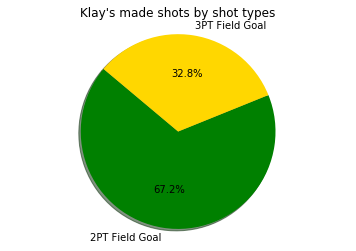

In [112]:
"""This section is to see Klay's made shots by shot types"""


shottypestats = madeshot.groupby(by='shot_type', as_index=False).agg({"game_date": pd.Series.nunique, 'time_remaining': pd.Series.nunique})
shottypestats = shottypestats.rename(columns={'shot_type': 'shot_type', 'time_remaining': 'times'})
TwoPT = shottypestats.iloc[0]['times']
ThreePT = shottypestats.iloc[1]['times']

#plot the pie chart
labels = '2PT Field Goal', '3PT Field Goal'
sizes = [TwoPT, ThreePT]
colors = ['green', 'gold']
explode = (0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title("Klay's made shots by shot types")
plt.show()

In [127]:
"""This section is to see top 10 distances from which Klay made his most shots"""

shotdistance = madeshot.groupby(by='shot_distance', as_index=False).agg({"game_date": pd.Series.nunique, 'time_remaining': pd.Series.nunique})
shotdistance = shotdistance.rename(columns={'shot_distance': 'shot_distance', 'time_remaining': 'times'})
shotdistance = shotdistance.sort_values(by='times', ascending=False)
shotdistance_top10 = shotdistance.head(10)
shotdistance_top10

,shot_distance,times
1,1,28
24,25,21
17,18,18
18,19,16
25,26,16
23,24,14
21,22,14
16,17,13
11,12,12
13,14,12


In [125]:
"""This section is to analyze Klay's shots by play types"""

madeshottype = madeshot.groupby(by='playtype', as_index=False).agg({"game_date": pd.Series.nunique, 'time_remaining': pd.Series.nunique})
madeshottype = madeshottype.rename(columns={'playtype': 'playtype', 'time_remaining': 'times'})
madeshottype = madeshottype.sort_values(by='times', ascending=False)
madeshottype = madeshottype.head(10)

trace1 = go.Bar(  
    x=madeshottype['playtype'],
    y=madeshottype['times'],
    name='Average Points per Game'
) 

data4 = [trace1]
layout4 = go.Layout( #starting to plot a grouped bar chart
    title="Klay's number of made shots by play type",
    barmode='group'
)

fig = go.Figure(data=data4, layout=layout4)
py.iplot(fig, filename='grouped-bar')

In [138]:
"""This section is to analyze the top 10 distances from which Klay made most his two pointers"""

select5 = """SELECT playtype, shot_type, game_date, period, time_remaining, shot_distance FROM madeshot WHERE shot_type='2PT Field Goal';"""
made2PT = pysqldf(select5)
TwoPTtype = made2PT.groupby(by='shot_distance', as_index=False).agg({"game_date": pd.Series.nunique, 'time_remaining': pd.Series.nunique})
TwoPTtype = TwoPTtype.rename(columns={'shot_distance': 'shot_distance', 'time_remaining': 'times'})
TwoPTtype = TwoPTtype.sort_values(by='times', ascending=False)
TwoPTtype = TwoPTtype.head(10)
TwoPTtype

,shot_distance,times
1,1,28
17,18,18
18,19,16
16,17,13
11,12,12
13,14,12
2,2,11
15,16,11
19,20,8
14,15,7


In [155]:
"""This section is to analyze the top 10 distances from which Klay made most his three pointers"""

select6 = """SELECT playtype, shot_type, game_date, period, time_remaining, shot_distance FROM madeshot WHERE shot_type='3PT Field Goal';"""
made3PT = pysqldf(select6)
select7 = """SELECT shot_distance, Count(period) as times FROM made3PT GROUP BY shot_distance"""
ThreePTtype = pysqldf(select7)
# ThreePT_period
# ThreePTtype = made3PT.groupby(by='shot_distance', as_index=False).agg({"game_date": pd.Series.nunique, 'time_remaining': pd.Series.nunique})
# ThreePTtype = ThreePTtype.rename(columns={'shot_distance': 'shot_distance', 'time_remaining': 'times'})
ThreePTtype = ThreePTtype.sort_values(by='times', ascending=False)
ThreePTtype = ThreePTtype.head(10)
ThreePTtype

,shot_distance,times
3,25,23
4,26,17
2,24,14
5,27,10
0,22,8
1,23,6
7,29,2
8,30,2
6,28,1
9,33,1


In [147]:
"""This section is to analyze his three pointers by period using nunique"""

ThreePT_period = made3PT.groupby(by='period', as_index=False).agg({"game_date": pd.Series.nunique, 'time_remaining': pd.Series.nunique})
ThreePT_period = ThreePT_period.rename(columns={'period': 'period', 'time_remaining': 'times'})
ThreePT_period

,period,game_date,times
0,1,10,16
1,2,14,22
2,3,14,22
3,4,14,22
4,5,1,1


In [156]:
"""This section is to analyze his three pointers by using SQL"""

select7 = """SELECT period, Count(shot_distance) FROM made3PT GROUP BY period"""
ThreePT_period = pysqldf(select7)
ThreePT_period

,period,Count(shot_distance)
0,1,16
1,2,22
2,3,22
3,4,23
4,5,1
